In [1]:
#Goal : Create word vectors from the essays and analyse them to see semantic similarity

In [2]:
#for word encoding
import codecs
#regex
import glob
#concurrency
import multiprocessing
#dealing with operation system, like reading a file
import os
#pretty printing, human readable
import pprint
#regular expression
import re
#natural language toolkit
import nltk
#word2vec
import gensim.models.word2vec as w2v
#dimensionality reduction
import sklearn.manifold
#math
import numpy as np
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
#parse pandas as pd
import pandas as pd

In [3]:
#clean data
nltk.download('punkt')#pretrained tokenizer
nltk.download('stopwords')#words like and, the, an, a etc

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arielcohencodar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arielcohencodar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#split the corpus into sentences
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [5]:
from src.preprocess import get_data, vectorize_essays, pad_embedding, word_count, essay_to_words
%load_ext autoreload
%autoreload 2

df_Essay=pd.read_pickle('./data/essay_df.pkl')
# Import training data from tsv file and store in a pandas dataframe
data_path = './data/training_set_rel3.tsv'
essay_df = get_data(data_path)

In [6]:
#We apply our tokenizer on out corpus
raw_sentences = tokenizer.tokenize(essay_df['essay'][0])

In [7]:
#convert into a list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [8]:
#sentence where each word is tokenize
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence)>0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [9]:
token_count = sum([len(sentence) for sentence in sentences])
print("The essay contains {0:,} tokens".format(token_count))

The essay contains 350 tokens


In [10]:
#Once we have vectors
#3 main tasks that vectors help with
#distance, similarity, ranking


#Dimensionality of the resulting word vectors
num_features = 300

#Minimum word count threshold for the multiprocessing (computing the word embeding in parallel sets)
min_word_count = 3

#Number for threads to run in parallel
num_workers = multiprocessing.cpu_count()

#Context window length (number around a word you take into account during the word embeding to catch the context)
context_size = 7

#Downsample setting for frequent words
downsampling = 1e-3

#Seed for the Random Number Generator, to make the results reproducible
seed = 1

In [11]:
model = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [12]:
model.build_vocab(sentences)

In [13]:
#Now we are ready to train
model.train(sentences, total_words=token_count, epochs=20)

(769, 7000)

In [14]:
#Compress the word vector into a 2D space and plot them
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [20]:
all_word_vectors_matrix = model.wv.vectors
len(all_word_vectors_matrix)

32

In [16]:
#Train tsne
all_word_vectors_matrix_2D = tsne.fit_transform(all_word_vectors_matrix)

In [17]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2D[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns = ["word", "x", "y"]
)

In [18]:
sns.set_context("poster")

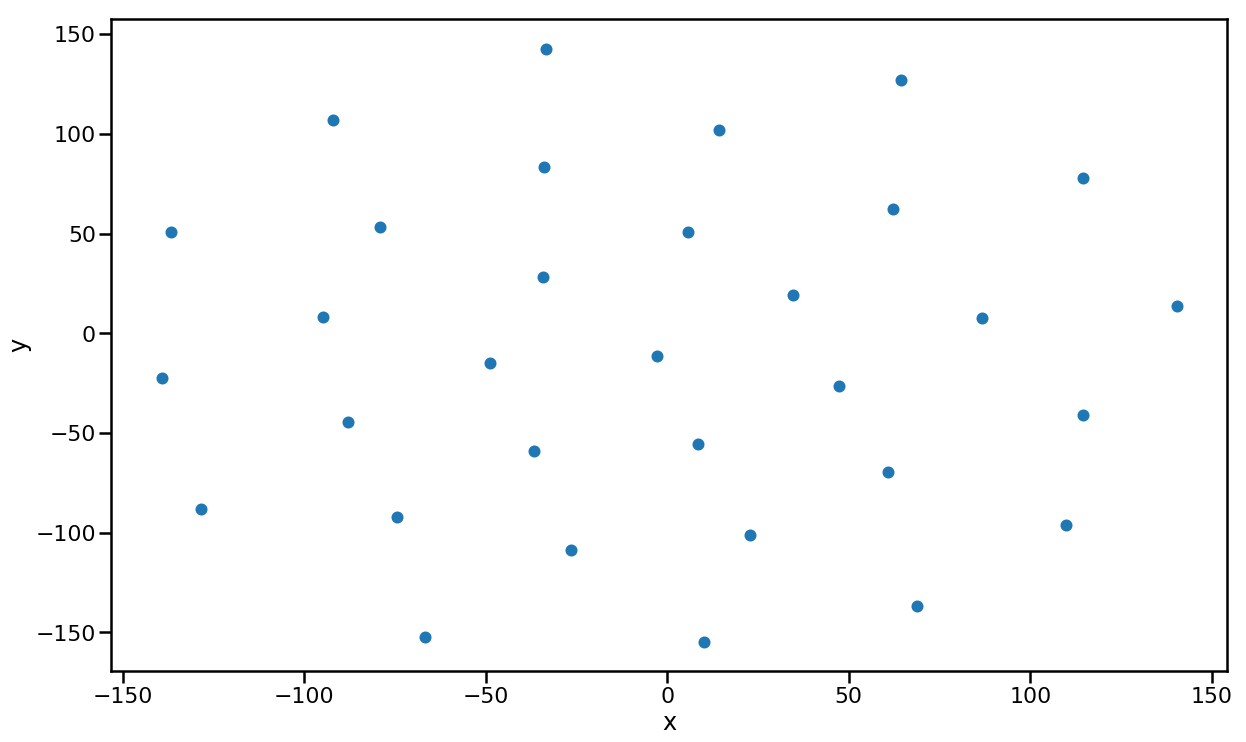

In [19]:
points.plot.scatter("x","y",s=100, figsize=(20, 12))